# Counter UUV System Simulation Analysis
This file documents the analysis of the simulation results for the counter UUV study.

## Model Baseline
The first step of the counter UUV system analysis is to establish the baseline performance of the threat UUV in the test environment.  To determine if the threat evaluation simulation is equivalent to this model, the parametric experiment is repeated.

### Repeat Vulnerability Study Experiment

In [2]:
# load datafiles
doe.verify <- read.csv("./v2_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.verify <- read.csv("./baseline/baseline counter baseline test-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.verify)[1] <- "experiment.number"

# build the dataset
data.verify <- merge(doe.verify, results.verify, "experiment.number")

In [3]:
library('dplyr')

# split the run results into quintiles by measure of performance
data.verify %>% mutate(
    mine.quintile = ntile(data.verify$count.mine.contacts, 5),
    step.quintile = ntile(data.verify$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.verify.quintiles

# plot the quintile distributions of the baseline
layout(matrix(c(1,2,3,4,5,6),2,3))
boxplot(count.mine.contacts~mine.quintile, data=data.baseline.quintiles, main='Mines')
boxplot(X.step.~step.quintile, data=data.baseline.quintiles, main='Steps')
boxplot(max.nav.error~nav.error.quintile, data=data.baseline.quintiles, main='NavErr')
boxplot(marker.mean~marker.mean.quintile, data=data.baseline.quintiles, main='MarkerMean')
boxplot(number.of.collisions~collisions.quintile, data=data.baseline.quintiles, main='Collisions')
boxplot(marker.std.dev~marker.std.quintile, data=data.baseline.quintiles, main='MarkerStdev')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



ERROR: Error in eval(m$data, parent.frame()): object 'data.baseline.quintiles' not found


We check if the vulnerability results are similar by computing the correlation matrix of the dataset.

Warning message:
"package 'Hmisc' was built under R version 3.5.2"Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.5.2"Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Warning message:
"package 'corrplot' was built under R version 3.5.2"corrplot 0.84 loaded


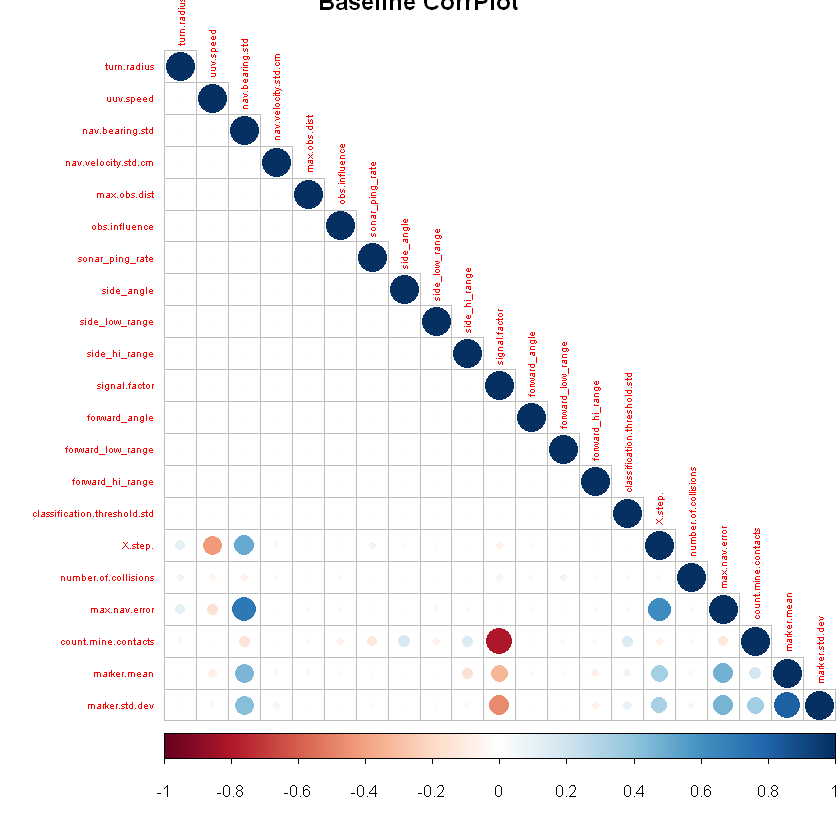

In [3]:
library(Hmisc)
library(corrplot)

cor.baseline <- rcorr(as.matrix(data.baseline[c(2:16,18:23)]))

corrplot(cor.baseline$r, main="Baseline CorrPlot", type="lower", tl.cex=0.5)

The repeat of the vulnerability study lines up with the original study, so we can be confident that this model will provide valid results.

In [39]:
# load datafiles
doe.baseline <- read.csv("./baseline_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.baseline <- read.csv("./baseline/baseline threat run randomized-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.baseline)[1] <- "experiment.number"

# build the dataset
data.baseline <- merge(doe.baseline, results.baseline, "experiment.number")

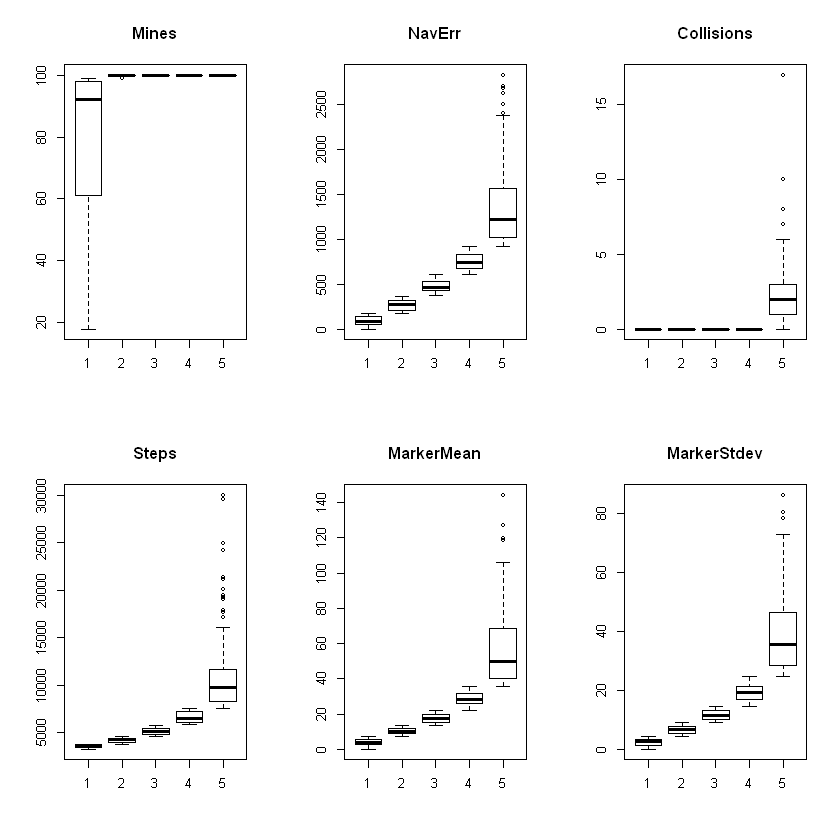

In [40]:
# split the run results into quintiles by measure of performance
data.baseline %>% mutate(
    mine.quintile = ntile(data.baseline$count.mine.contacts, 5),
    step.quintile = ntile(data.baseline$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.baseline.quintiles

# plot the quintile distributions of the baseline
layout(matrix(c(1,2,3,4,5,6),2,3))
boxplot(count.mine.contacts~mine.quintile, data=data.baseline.quintiles, main='Mines')
boxplot(X.step.~step.quintile, data=data.baseline.quintiles, main='Steps')
boxplot(max.nav.error~nav.error.quintile, data=data.baseline.quintiles, main='NavErr')
boxplot(marker.mean~marker.mean.quintile, data=data.baseline.quintiles, main='MarkerMean')
boxplot(number.of.collisions~collisions.quintile, data=data.baseline.quintiles, main='Collisions')
boxplot(marker.std.dev~marker.std.quintile, data=data.baseline.quintiles, main='MarkerStdev')

In [42]:
# load datafiles
doe.spoofer <- read.csv("./spoofer_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.spoofer <- read.csv("./spoofer/baseline random spoofers fixed-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.spoofer)[1] <- "experiment.number"

# build the dataset
data.spoofer <- merge(doe.spoofer, results.spoofer, "experiment.number")

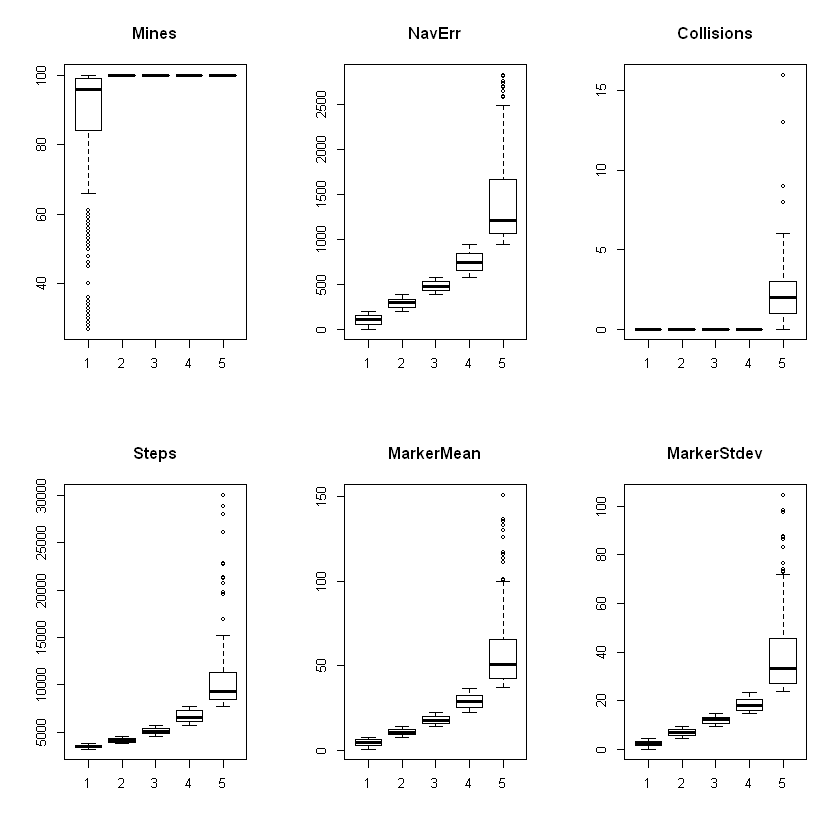

In [43]:
# split the run results into quintiles by measure of performance
data.spoofer %>% mutate(
    mine.quintile = ntile(data.spoofer$count.mine.contacts, 5),
    step.quintile = ntile(data.spoofer$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.spoofer.quintiles

# plot the quintile distributions of the baseline
layout(matrix(c(1,2,3,4,5,6),2,3))
boxplot(count.mine.contacts~mine.quintile, data=data.spoofer.quintiles, main='Mines')
boxplot(X.step.~step.quintile, data=data.spoofer.quintiles, main='Steps')
boxplot(max.nav.error~nav.error.quintile, data=data.spoofer.quintiles, main='NavErr')
boxplot(marker.mean~marker.mean.quintile, data=data.spoofer.quintiles, main='MarkerMean')
boxplot(number.of.collisions~collisions.quintile, data=data.spoofer.quintiles, main='Collisions')
boxplot(marker.std.dev~marker.std.quintile, data=data.spoofer.quintiles, main='MarkerStdev')

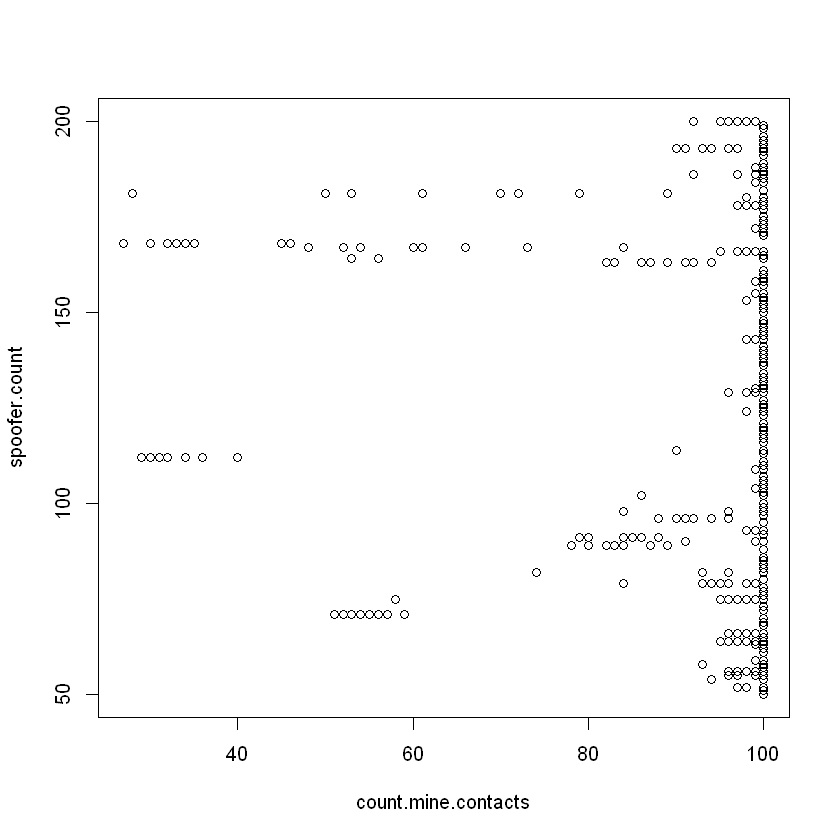

In [52]:
plot(spoofer.count ~ count.mine.contacts, data=data.spoofer)

In [58]:
cor(data.spoofer)

,experiment.number,source.level,classification.threshold.std,classification.threshold.mean,sonar_ping_rate,uuv.speed,turn.radius,side_angle,side_hi_range,forward_angle,...,spoofer.heading,spoofer.strength,X.run.number.,random.seed,X.step.,number.of.collisions,max.nav.error,count.mine.contacts,marker.mean,marker.std.dev
experiment.number,1.00000000,-4.165853e-02,-7.792595e-02,-6.352876e-02,-3.210247e-02,-1.704589e-02,2.777404e-02,3.718610e-02,1.484652e-02,-3.649070e-02,...,-7.600256e-02,-5.790863e-02,0.099997025,0.000000e+00,0.038902046,0.046925878,0.064135337,-0.020178078,0.0411733722,0.0804935412
source.level,-0.04165853,1.000000e+00,2.422381e-03,-5.253293e-03,-4.827409e-03,7.392940e-03,1.520253e-03,-4.030226e-04,2.287209e-04,1.072904e-03,...,1.287580e-03,5.888348e-03,-0.004165729,1.849002e-21,0.050131237,0.007143990,0.023025274,0.371913006,-0.0947701461,-0.0229646378
classification.threshold.std,-0.07792595,2.422381e-03,1.000000e+00,1.217625e-02,-1.268578e-02,1.926905e-03,-5.151353e-03,-5.473111e-03,4.876350e-03,-1.746463e-04,...,-4.082326e-03,-2.420486e-03,-0.007792363,-6.332597e-22,0.010428396,-0.027938217,0.009280439,0.218951763,-0.0462238378,0.0086517076
classification.threshold.mean,-0.06352876,-5.253293e-03,1.217625e-02,1.000000e+00,6.398438e-04,-3.204799e-02,7.243642e-03,-7.422139e-03,5.568429e-03,1.099691e-02,...,-1.774362e-02,1.284448e-02,-0.006352687,3.872015e-21,0.027287913,0.030258601,0.004892912,-0.143502477,-0.0072493878,0.0033994050
sonar_ping_rate,-0.03210247,-4.827409e-03,-1.268578e-02,6.398438e-04,1.000000e+00,5.845878e-03,-4.241036e-03,-9.517786e-03,-1.353697e-02,1.863189e-03,...,4.586831e-05,3.660423e-03,-0.003210151,-2.514628e-22,0.008191607,-0.003249863,0.021087679,0.062828618,0.0254912893,0.0439080206
uuv.speed,-0.01704589,7.392940e-03,1.926905e-03,-3.204799e-02,5.845878e-03,1.000000e+00,1.405905e-02,-9.137632e-04,2.737736e-03,-6.262252e-03,...,-4.771154e-03,5.123363e-03,-0.001704538,-5.999378e-23,-0.462070378,-0.134673823,-0.213063264,-0.049489558,-0.2381994176,-0.2509370421
turn.radius,0.02777404,1.520253e-03,-5.151353e-03,7.243642e-03,-4.241036e-03,1.405905e-02,1.000000e+00,1.570883e-02,2.798566e-03,1.306829e-04,...,-1.548463e-03,-3.533759e-03,0.002777321,-1.846062e-22,0.000103503,0.064957071,-0.021739471,0.081532632,-0.0081240427,-0.0143803607
side_angle,0.03718610,-4.030226e-04,-5.473111e-03,-7.422139e-03,-9.517786e-03,-9.137632e-04,1.570883e-02,1.000000e+00,1.446180e-03,-5.414911e-03,...,-2.988906e-03,1.638457e-02,0.003718499,1.026622e-21,0.003319152,0.038623446,-0.003495220,-0.052711898,-0.0117375047,-0.0242885851
side_hi_range,0.01484652,2.287209e-04,4.876350e-03,5.568429e-03,-1.353697e-02,2.737736e-03,2.798566e-03,1.446180e-03,1.000000e+00,3.795626e-03,...,-3.262193e-03,-3.496494e-03,0.001484608,1.849341e-21,-0.037838862,-0.036918807,-0.003287334,0.043998156,-0.0886749785,-0.0640121604
forward_angle,-0.03649070,1.072904e-03,-1.746463e-04,1.099691e-02,1.863189e-03,-6.262252e-03,1.306829e-04,-5.414911e-03,3.795626e-03,1.000000e+00,...,2.851953e-03,7.412325e-03,-0.003648961,7.926154e-21,0.018242537,0.004708123,-0.001015749,-0.026558493,0.0688175191,0.0437176836


In [44]:
library(ggfortify)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     1.8367 1.24891 1.14706 1.05499 1.04427 1.0249 1.02144
Proportion of Variance 0.1298 0.05999 0.05061 0.04281 0.04194 0.0404 0.04013
Cumulative Proportion  0.1298 0.18974 0.24035 0.28316 0.32510 0.3655 0.40562
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.01329 1.00964 1.00596 1.00296 1.00088 0.99970 0.99827
Proportion of Variance 0.03949 0.03921 0.03892 0.03869 0.03853 0.03844 0.03833
Cumulative Proportion  0.44511 0.48432 0.52324 0.56193 0.60046 0.63890 0.67723
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.99570 0.99257 0.98846 0.98336 0.97859 0.95273 0.9006
Proportion of Variance 0.03813 0.03789 0.03758 0.03719 0.03683 0.03491 0.0312
Cumulative Proportion  0.71536 0.75325 0.79083 0.82802 0.86486 0.89977 0.9310
                          PC22    PC23

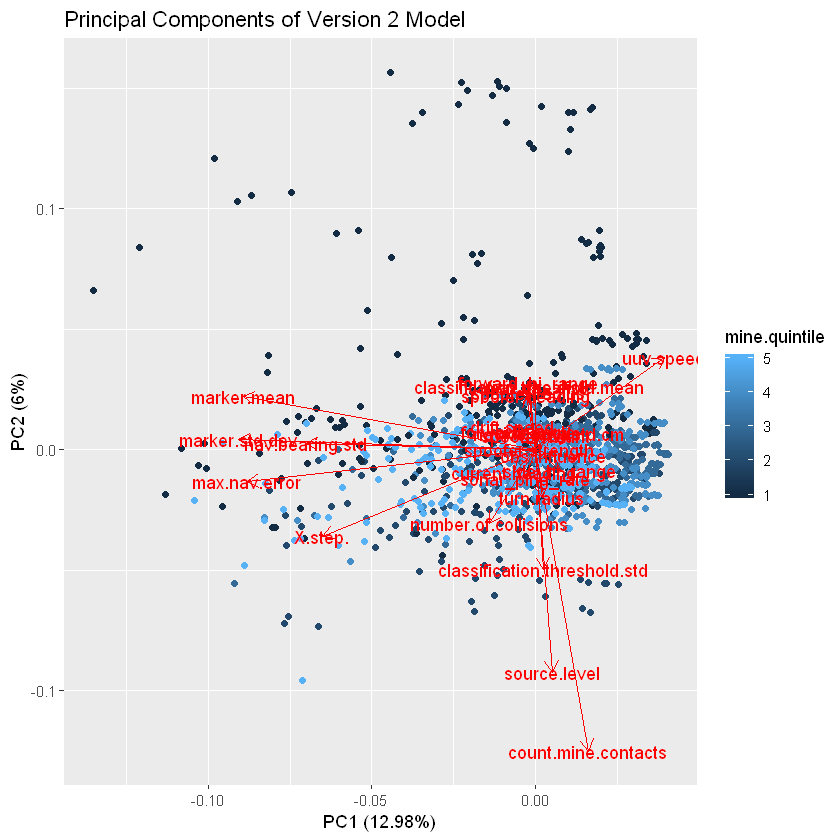

In [49]:
data.spoofer.pca <- prcomp(data.spoofer[c(2:21,24:29)], scale=TRUE)
summary(data.spoofer.pca)
autoplot(data.spoofer.pca, data=data.spoofer.quintiles, colour='mine.quintile', main="Principal Components of Version 2 Model", loadings=TRUE, loadings.label=TRUE)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8360 1.2427 1.17427 1.05551 1.04485 1.02165 1.01963
Proportion of Variance 0.1297 0.0594 0.05303 0.04285 0.04199 0.04015 0.03999
Cumulative Proportion  0.1297 0.1890 0.24209 0.28494 0.32693 0.36707 0.40706
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.01133 1.00755 1.00623 1.00458 1.00173 0.99945 0.99768
Proportion of Variance 0.03934 0.03904 0.03894 0.03881 0.03859 0.03842 0.03828
Cumulative Proportion  0.44640 0.48544 0.52438 0.56320 0.60179 0.64021 0.67850
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.99674 0.99345 0.98995 0.98405 0.97623 0.94252 0.88359
Proportion of Variance 0.03821 0.03796 0.03769 0.03724 0.03666 0.03417 0.03003
Cumulative Proportion  0.71671 0.75467 0.79236 0.82960 0.86626 0.90043 0.93045
                          PC22    

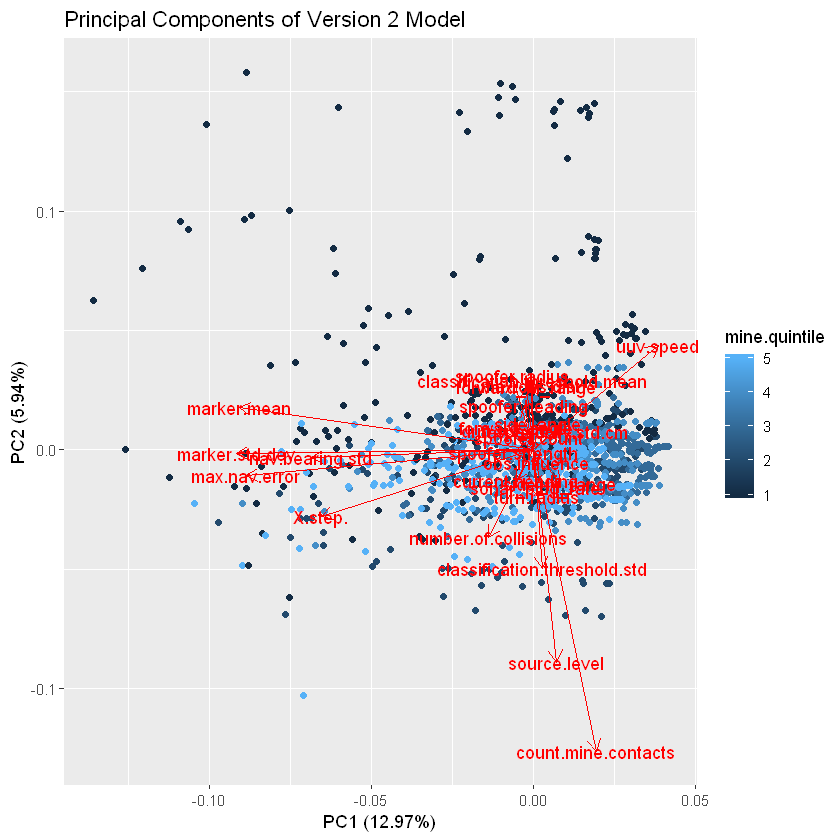

In [64]:
data.big.spoofer.pca <- prcomp(data.big.spoofer[c(2:21,24:29)], scale=TRUE)
summary(data.big.spoofer.pca)
autoplot(data.big.spoofer.pca, data=data.big.spoofer.quintiles, colour='mine.quintile', main="Principal Components of Version 2 Model", loadings=TRUE, loadings.label=TRUE)

In [47]:
colnames(data.spoofer)

[1] "experiment.number"             "source.level"                 
 [3] "classification.threshold.std"  "classification.threshold.mean"
 [5] "sonar_ping_rate"               "uuv.speed"                    
 [7] "turn.radius"                   "side_angle"                   
 [9] "side_hi_range"                 "forward_angle"                
[11] "forward_hi_range"              "max.obs.dist"                 
[13] "obs.influence"                 "nav.bearing.std"              
[15] "nav.velocity.std.cm"           "current.heading"              
[17] "drift.speed"                   "spoofer.count"                
[19] "spoofer.radius"                "spoofer.heading"              
[21] "spoofer.strength"              "X.run.number."                
[23] "random.seed"                   "X.step."                      
[25] "number.of.collisions"          "max.nav.error"                
[27] "count.mine.contacts"           "marker.mean"                  
[29] "marker.std.dev"

In [62]:
# load datafiles
doe.big.spoofer <- read.csv("./big_spoofer_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.big.spoofer <- read.csv("./spoofer/baseline random big spoofers-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.big.spoofer)[1] <- "experiment.number"

# build the dataset
data.big.spoofer <- merge(doe.big.spoofer, results.big.spoofer, "experiment.number")

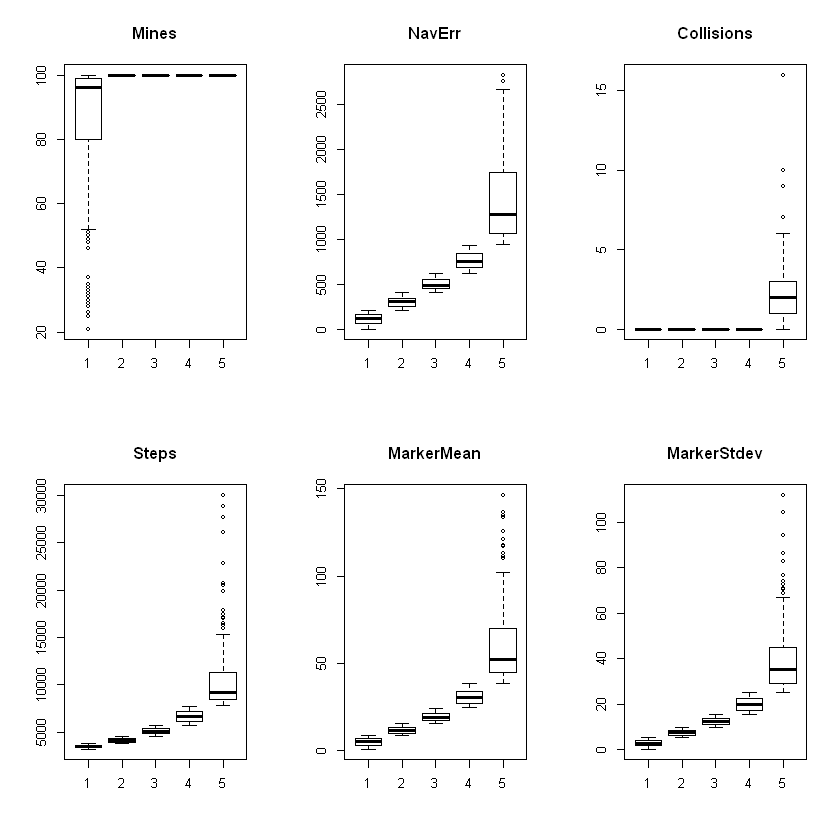

In [63]:
# split the run results into quintiles by measure of performance
data.big.spoofer %>% mutate(
    mine.quintile = ntile(data.big.spoofer$count.mine.contacts, 5),
    step.quintile = ntile(data.big.spoofer$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.big.spoofer.quintiles

# plot the quintile distributions of the baseline
layout(matrix(c(1,2,3,4,5,6),2,3))
boxplot(count.mine.contacts~mine.quintile, data=data.big.spoofer.quintiles, main='Mines')
boxplot(X.step.~step.quintile, data=data.big.spoofer.quintiles, main='Steps')
boxplot(max.nav.error~nav.error.quintile, data=data.big.spoofer.quintiles, main='NavErr')
boxplot(marker.mean~marker.mean.quintile, data=data.big.spoofer.quintiles, main='MarkerMean')
boxplot(number.of.collisions~collisions.quintile, data=data.big.spoofer.quintiles, main='Collisions')
boxplot(marker.std.dev~marker.std.quintile, data=data.big.spoofer.quintiles, main='MarkerStdev')

In [65]:
# alt spoofer trial sets navigation error to 0, so disregard values in the doe file.
# load datafiles
doe.big.alt.spoofer <- read.csv("./big_spoofer_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.big.alt.spoofer <- read.csv("./spoofer/baseline random big spoofers alt-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.big.alt.spoofer)[1] <- "experiment.number"

# build the dataset
data.big.alt.spoofer <- merge(doe.big.alt.spoofer, results.big.alt.spoofer, "experiment.number")

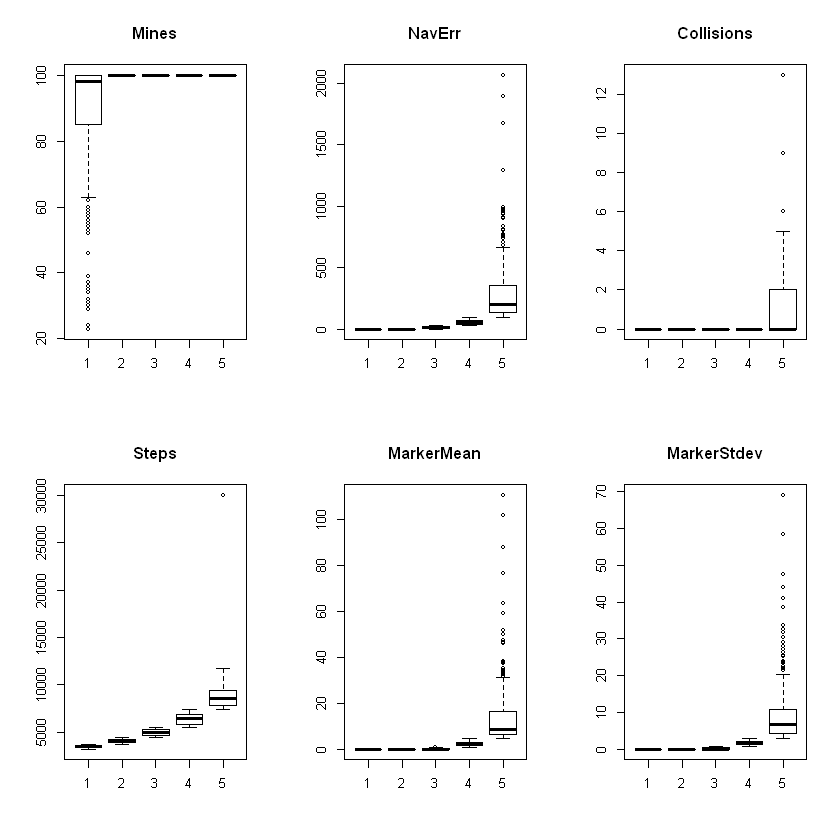

In [66]:
# split the run results into quintiles by measure of performance
data.big.alt.spoofer %>% mutate(
    mine.quintile = ntile(data.big.alt.spoofer$count.mine.contacts, 5),
    step.quintile = ntile(data.big.alt.spoofer$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.big.alt.spoofer.quintiles

# plot the quintile distributions of the baseline
layout(matrix(c(1,2,3,4,5,6),2,3))
boxplot(count.mine.contacts~mine.quintile, data=data.big.alt.spoofer.quintiles, main='Mines')
boxplot(X.step.~step.quintile, data=data.big.alt.spoofer.quintiles, main='Steps')
boxplot(max.nav.error~nav.error.quintile, data=data.big.alt.spoofer.quintiles, main='NavErr')
boxplot(marker.mean~marker.mean.quintile, data=data.big.alt.spoofer.quintiles, main='MarkerMean')
boxplot(number.of.collisions~collisions.quintile, data=data.big.alt.spoofer.quintiles, main='Collisions')
boxplot(marker.std.dev~marker.std.quintile, data=data.big.alt.spoofer.quintiles, main='MarkerStdev')

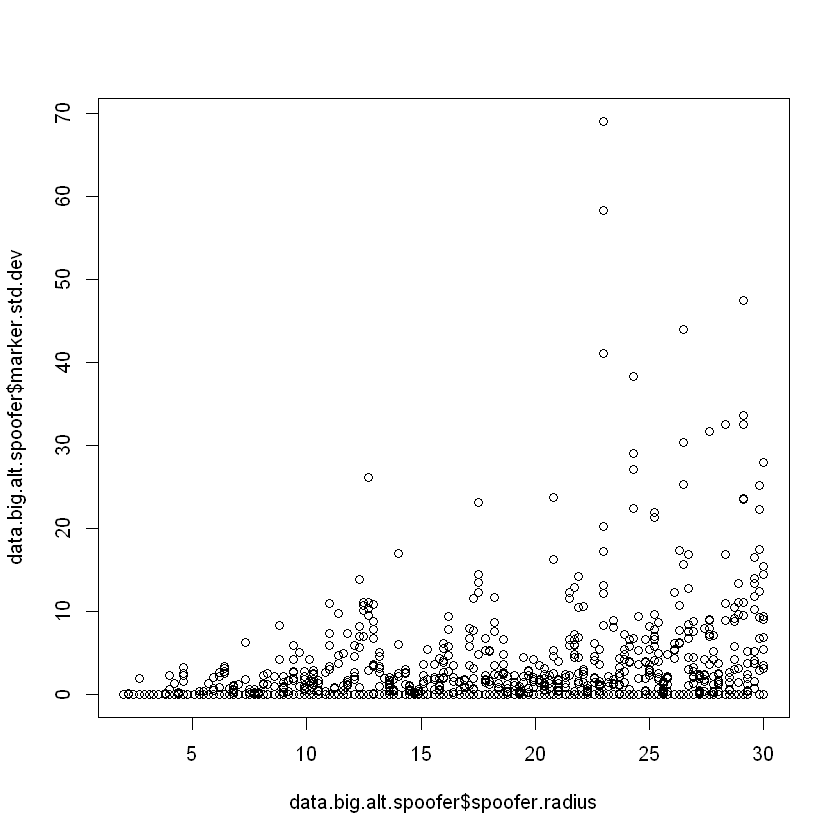

In [92]:
plot(data.big.alt.spoofer$marker.std.dev ~ data.big.alt.spoofer$spoofer.radius)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.7418 1.28661 1.23359 1.06507 1.04770 1.02607 1.01919
Proportion of Variance 0.1167 0.06367 0.05853 0.04363 0.04222 0.04049 0.03995
Cumulative Proportion  0.1167 0.18035 0.23888 0.28251 0.32473 0.36522 0.40517
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     1.01284 1.01060 1.0083 1.00338 1.00258 1.00005 0.99746
Proportion of Variance 0.03946 0.03928 0.0391 0.03872 0.03866 0.03847 0.03827
Cumulative Proportion  0.44463 0.48391 0.5230 0.56174 0.60040 0.63886 0.67713
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.99648 0.99462 0.99051 0.98697 0.97539 0.94484 0.88411
Proportion of Variance 0.03819 0.03805 0.03774 0.03747 0.03659 0.03434 0.03006
Cumulative Proportion  0.71532 0.75337 0.79110 0.82857 0.86516 0.89950 0.92956
                          PC22    

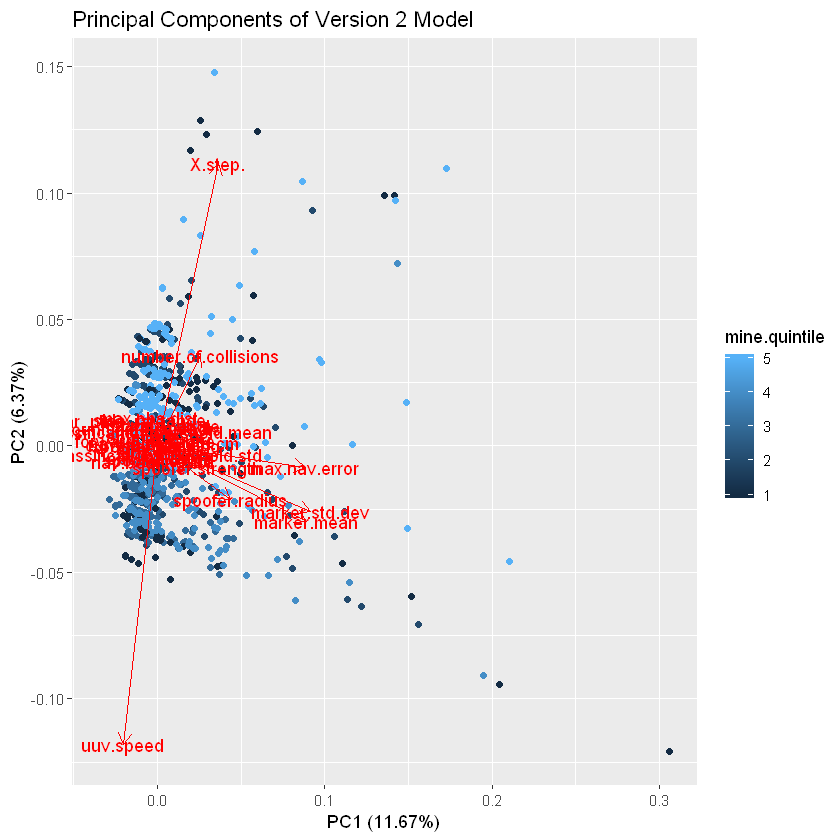

In [72]:
data.big.alt.spoofer.pca <- prcomp(data.big.alt.spoofer[c(2:21,24:29)], scale=TRUE)
summary(data.big.alt.spoofer.pca)
autoplot(data.big.alt.spoofer.pca, data=data.big.alt.spoofer.quintiles, colour='mine.quintile', main="Principal Components of Version 2 Model", loadings=TRUE, loadings.label=TRUE)

In [73]:
data.big.alt.spoofer.pca

Standard deviations (1, .., p=26):
 [1] 1.7417804 1.2866124 1.2335945 1.0650719 1.0476974 1.0260651 1.0191862
 [8] 1.0128356 1.0106024 1.0083014 1.0033847 1.0025766 1.0000453 0.9974621
[15] 0.9964771 0.9946241 0.9905108 0.9869723 0.9753896 0.9448449 0.8841063
[22] 0.8259676 0.7057850 0.6199056 0.4130034 0.3102412

Rotation (n x k) = (26 x 26):
                                        PC1           PC2          PC3
source.level                  -0.0075197849  0.0207720242 -0.479524308
classification.threshold.std   0.0009605837 -0.0192679153 -0.306079520
classification.threshold.mean  0.0020875049  0.0317039736  0.196001579
sonar_ping_rate               -0.1935392890  0.0583835292 -0.051189260
uuv.speed                     -0.1159975574 -0.6761853487  0.016133749
turn.radius                    0.0059312725 -0.0030762815 -0.119744754
side_angle                     0.0194942302 -0.0152523176  0.068761194
side_hi_range                 -0.0229455482  0.0592405426 -0.078359541
forward_angle  

In [90]:
fit <- lm(marker.std.dev ~ uuv.speed + spoofer.count + spoofer.radius + spoofer.heading + spoofer.strength + sonar_ping_rate + source.level, data=data.big.alt.spoofer)

In [91]:
fit


Call:
lm(formula = marker.std.dev ~ uuv.speed + spoofer.count + spoofer.radius + 
    spoofer.heading + spoofer.strength + sonar_ping_rate + source.level, 
    data = data.big.alt.spoofer)

Coefficients:
     (Intercept)         uuv.speed     spoofer.count    spoofer.radius  
       0.0005485        -0.5027096         0.0029752         0.2142950  
 spoofer.heading  spoofer.strength   sonar_ping_rate      source.level  
      -0.0021316         0.1806978        -0.3461396         0.0096668  


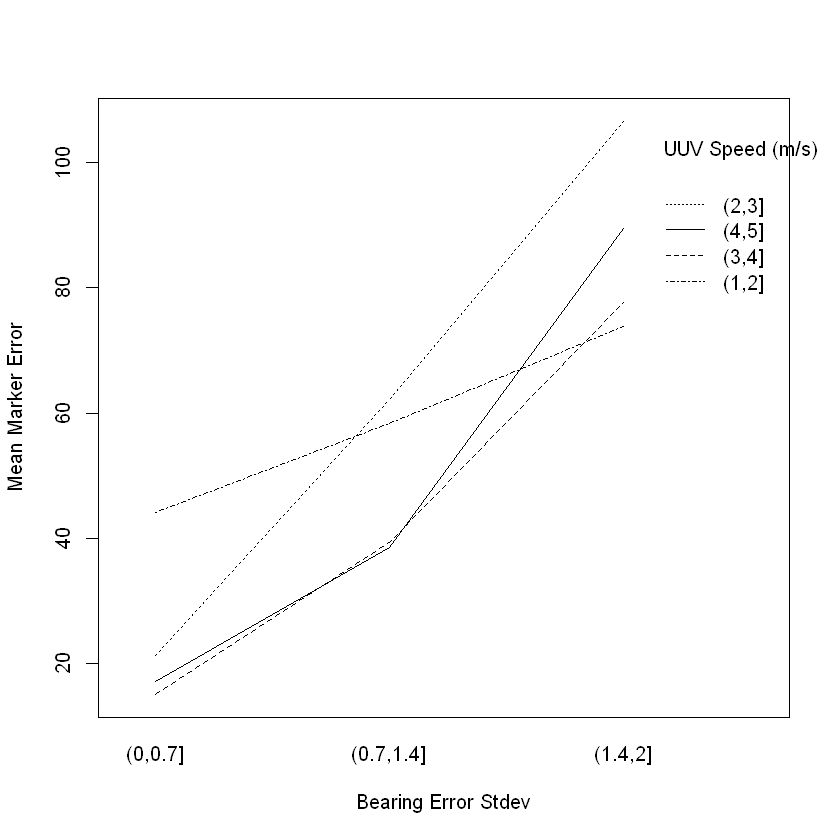

In [15]:
interaction.plot(cut(data.verify$nav.bearing.std, breaks=c(0,.7,1.4,2)), cut(data.verify$uuv.speed, breaks=c(1,2,3,4,5)), data.verify$marker.mean, trace.label='UUV Speed (m/s)', xlab='Bearing Error Stdev', ylab='Mean Marker Error')

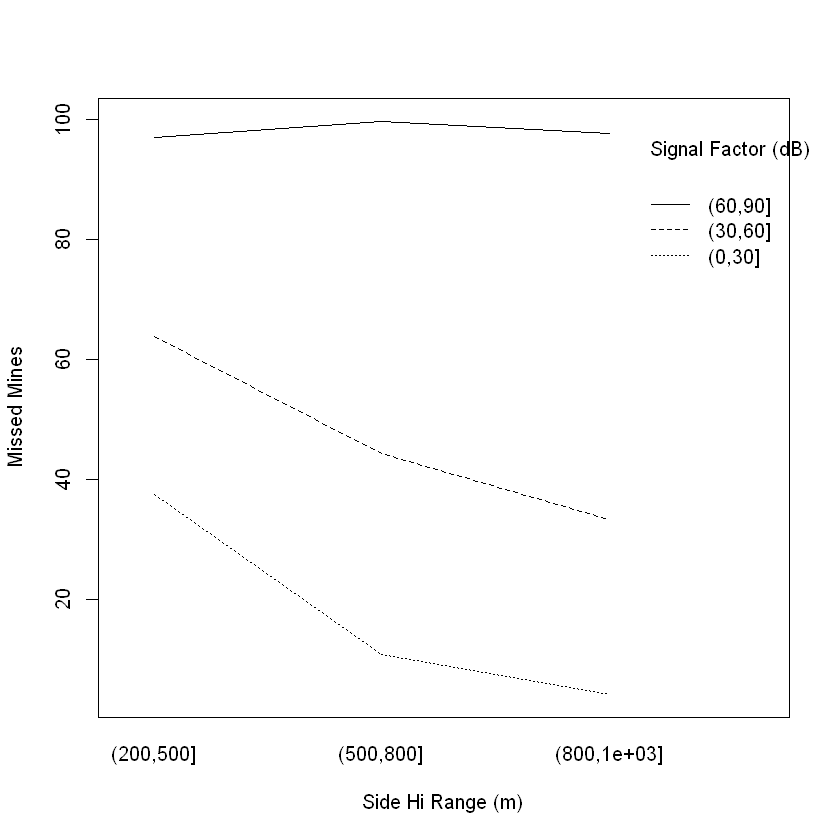

In [13]:
interaction.plot(cut(data.verify$side_hi_range, breaks=c(200,500,800,1000)), cut(data.verify$signal.factor, breaks=c(0,30,60,90)), 100 - data.verify$count.mine.contacts, trace.label='Signal Factor (dB)', xlab='Side Hi Range (m)', ylab='Missed Mines')

In [6]:
summary(data.verify)

 experiment.number  turn.radius     uuv.speed     nav.bearing.std
 Min.   :  0       Min.   : 2.0   Min.   :1.000   Min.   :0.0    
 1st Qu.: 32       1st Qu.: 6.5   1st Qu.:2.000   1st Qu.:0.5    
 Median : 64       Median :11.0   Median :3.000   Median :1.0    
 Mean   : 64       Mean   :11.0   Mean   :3.001   Mean   :1.0    
 3rd Qu.: 96       3rd Qu.:15.5   3rd Qu.:4.000   3rd Qu.:1.5    
 Max.   :128       Max.   :20.0   Max.   :5.000   Max.   :2.0    
 nav.velocity.std.cm  max.obs.dist   obs.influence  sonar_ping_rate
 Min.   :0.0         Min.   : 1.00   Min.   :0.50   Min.   : 1.0   
 1st Qu.:0.5         1st Qu.: 8.25   1st Qu.:1.63   1st Qu.:16.0   
 Median :1.0         Median :15.50   Median :2.75   Median :31.0   
 Mean   :1.0         Mean   :15.50   Mean   :2.75   Mean   :30.5   
 3rd Qu.:1.5         3rd Qu.:22.75   3rd Qu.:3.88   3rd Qu.:45.0   
 Max.   :2.0         Max.   :30.00   Max.   :5.00   Max.   :60.0   
   side_angle     side_low_range  side_hi_range    signal.fact


Call:
lm(formula = 100 - count.mine.contacts ~ signal.factor, data = data.verify)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.557 -12.463   0.788  14.455  83.816 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.11667    1.34446  -0.831    0.406    
signal.factor  1.26200    0.02582  48.872   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.29 on 1288 degrees of freedom
Multiple R-squared:  0.6497,	Adjusted R-squared:  0.6494 
F-statistic:  2389 on 1 and 1288 DF,  p-value: < 2.2e-16


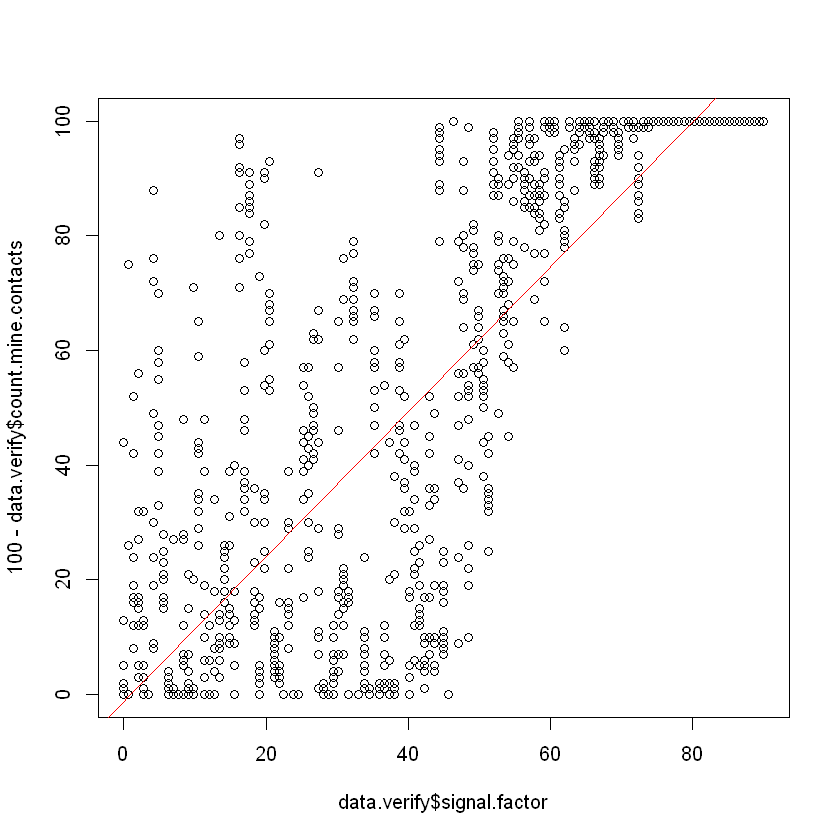

In [31]:
mine.model <- lm(100-count.mine.contacts~signal.factor, data=data.verify)
plot(100-data.verify$count.mine.contacts~data.verify$signal.factor)
abline(mine.model, col='red')
summary(mine.model)

In [26]:
library(ggplot2)

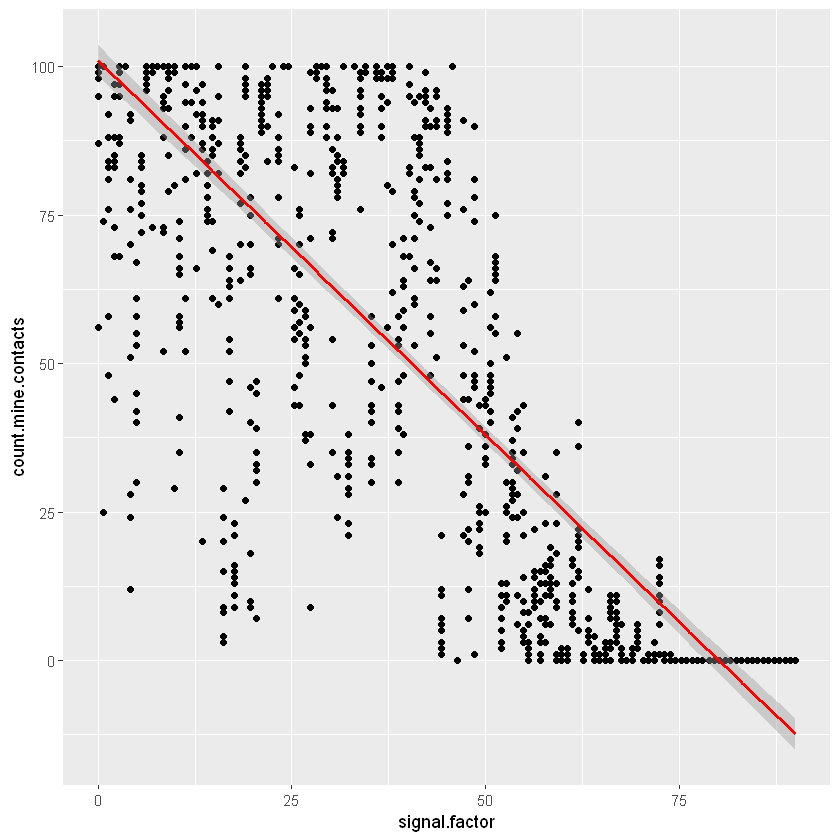

In [27]:
ggplot(data.verify,aes(x=signal.factor,y=count.mine.contacts)) + geom_point() + stat_smooth(method='lm', col='red')